# SBB Datasets Exploration

This notebook contains the initial exporation of potential datasets and functionalities extract relevant information


Data Sources:
1. Railway network
2. Construction sites
3. Extra trains
4. Capacity of the operating point section

Other sources
1. [More general](https://opendata.swiss/en/dataset?q=SBB)

TODO: 
1. visualize mock.points in the map
2. work with json format

In [94]:
import numpy as np
import pandas as pd

import json
import geopandas as gpd
#from geojson import Point
from shapely.geometry import Point

time_fmt = "%Y-%m-%d"

## Section 1: looking at Geojson

*Useful links*
1. [geopandas](https://www.twilio.com/blog/2017/08/geospatial-analysis-python-geojson-geopandas.html)

In [44]:
import geopandas as gpd

sbb_plan = gpd.read_file('linie-mit-polygon.geojson')

len_df = len(sbb_plan)
ncol = len(sbb_plan.columns.values)

print(f"Number of observations: {len_df}, Number of attributes {ncol}\nAttributes:\n{sbb_plan.columns.values}")

Number of observations: 3023, Number of attributes 11
Attributes:
['bp_end_bez' 'bp_ende' 'spurweite' 'bp_anf_bez' 'geo_point_2d'
 'liniename' 'linienr' 'km_agm_von' 'km_agm_bis' 'bp_anfang' 'geometry']


In [38]:
print(sbb_plan.head())

                bp_end_bez bp_ende spurweite     bp_anf_bez  \
0                   Gonten    GONT         M      Jakobsbad   
1               Tägerschen    TAEN         N     Bettwiesen   
2       Tobel-Affeltrangen     TOA         N     Tägerschen   
3             Walzenhausen    WALZ         S      Ruderbach   
4  Schwarzenburg Gleisende    SCGE         N  Schwarzenburg   

                                  geo_point_2d  \
0  {'lat': 47.3227434513, 'lon': 9.3384392062}   
1  {'lat': 47.5043491938, 'lon': 9.0218500787}   
2  {'lat': 47.5158011135, 'lon': 9.0286578485}   
3  {'lat': 47.4564341505, 'lon': 9.5982793517}   
4  {'lat': 46.8188865938, 'lon': 7.3418148774}   

                             liniename  linienr  km_agm_von  km_agm_bis  \
0               Gossau SG - Wasserauen      854   19018.335   20861.893   
1                     Wil - Weinfelden      830    5450.482    6714.256   
2                     Wil - Weinfelden      830    6714.256    8224.717   
3              Rhein

In [95]:
#Point((sbb_plan["geo_point_2d"][0]['lat'], sbb_plan["geo_point_2d"][0]['lon']))
sbb_plan["point_2d"] = sbb_plan["geo_point_2d"].apply(lambda x: Point((x['lat'], x['lon'])))

**Working with a `LineStrin` object**

See: [LineString](https://shapely.readthedocs.io/en/stable/manual.html)

In [59]:
sbb_plan["geometry"][0].geom_type

'LineString'

In [68]:
sbb_plan["geometry"][0].length
sbb_plan["geometry"][0].area
len(sbb_plan["geometry"][0].coords)
sbb_plan["geometry"][0].bounds

(9.3281821136, 47.320047544, 9.3474044154, 47.3281388816)

In [67]:
list(sbb_plan["geometry"][0].coords)[:10]

[(9.3281821136, 47.320047544),
 (9.3283128655, 47.3200611197),
 (9.3284436178, 47.3200747042),
 (9.3285743701, 47.3200882886),
 (9.3287051222, 47.3201018638),
 (9.3288358747, 47.3201154479),
 (9.3289666272, 47.3201290318),
 (9.3290973795, 47.3201426066),
 (9.3292281322, 47.3201561902),
 (9.3293588982, 47.3201697735)]

TypeError: no numeric data to plot

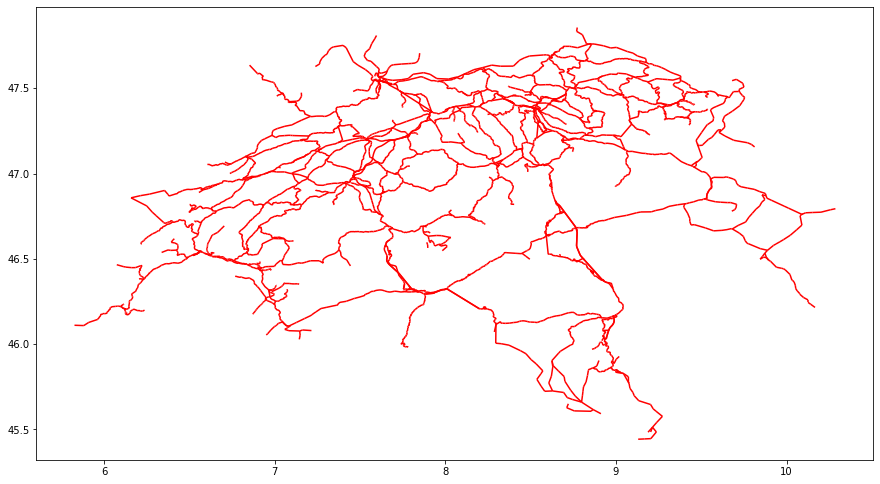

In [97]:
#plot(sbb_plan["geometry"][0])
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,25))
sbb_plan["geometry"].plot( markersize=20, ax=ax, color = 'red', label='Maintenance')
sbb_plan["point_2d"].plot( markersize=20, ax=ax, color = 'blue', label='Maintenance')
plt.show()

In [102]:
from shapely import wkt
#sbb_plan["point_2d"] = sbb_plan["point_2d"].apply(wkt.loads)

sbb_plan["point_2d"].plot( markersize=20, ax=ax, color = 'blue', label='Maintenance')

TypeError: no numeric data to plot

## Section 2: json

In [34]:
filename_ops_json = "mock_ops.json"
filename_line_json = "mock_ops.json"

mock_pts = pd.read_json(filename_json)
mock_line = pd.read_json(filename_line_json)

#with open(filename_json) as f:
#    d = json.load(f)
#    print(d)

In [36]:
#mock_line

## Section 3: CSV

In [45]:
construct_site = pd.read_csv("construction-site.csv", sep=";")

#format datetime
construct_site["date_from"] = pd.to_datetime(construct_site["date_from"], format = time_fmt)
construct_site["date_to"] = pd.to_datetime(construct_site["date_to"], format = time_fmt)

len_df = len(construct_site)
ncol = len(construct_site.columns.values)

print(f"Number of observations: {len_df}, Number of attributes {ncol}\nAttribues\n{construct_site.columns.values}")

Number of observations: 463, Number of attributes 15
Attribues
['region' 'nom_du_projet_projektbezeichnung' 'bp_from' 'bp_to' 'km_from'
 'km_to' 'distance' 'bemerkungen' 'date_from' 'date_to' 'weeks'
 'umsetzung_intervalltyp_umleitung' 'reduction_capacity' 'geopos'
 'von_bezeichnung_offiziell']


In [11]:
# General statistics:
construct_site.head()

,region,nom_du_projet_projektbezeichnung,bp_from,bp_to,km_from,km_to,distance,bemerkungen,date_from,date_to,weeks,umsetzung_intervalltyp_umleitung,reduction_capacity,geopos,von_bezeichnung_offiziell
0,RWT,La Plaine : prèparation nouvelle gare,LP,LP,NaN,NaN,NaN,NaN,2024-07-15,2024-07-28,2.0,Sperre Strecke 24 Std,1.00,"46.1786654048, 5.99999275337",La Plaine
1,RWT,RIM Vernier Meyrin Cargo - Satgny,NaN,NaN,NaN,NaN,NaN,NaN,2026-07-01,2026-08-25,8.0,Sperre Strecke 24 Std,0.50,NaN,NaN
2,RWT,Genève Aéroport : remise en conformité zone d'...,GEAP,CHNE,65.50,65.5,NaN,NaN,2023-10-01,2024-03-30,26.0,Sperre Strecke 24 Std,0.50,"46.2171294664, 6.10260397474",Châtelaine (bif)
3,RWT,Genéve : assainissement du PI de la Paix,GE,GE,58.75,58.75,NaN,NaN,2023-01-01,2024-12-28,104.0,Sperre Strecke Nacht,0.25,"46.2102129079, 6.14245160789",Genève
4,RWT,Morges - St.Prex : FbE voie 309,MOR,STP,13.10,16.6,3.5,NaN,2024-07-01,2024-07-28,4.0,Sperre Strecke 24 Std,0.50,"46.4823168698, 6.45590595285",St-Prex


In [22]:
# Summary statistics
construct_site.describe()

,km_from,weeks,reduction_capacity
count,184.000000,454.000000,276.000000
mean,70.052902,84.162996,0.435688
std,49.557753,94.071247,0.238716
min,0.050000,1.000000,0.250000
25%,29.657000,15.000000,0.250000
50%,64.175000,52.000000,0.500000
75%,102.325000,100.000000,0.500000
max,186.908000,550.000000,1.000000


**Q:** Missing values

In [13]:
construct_site.isnull().sum()

region                                0
nom_du_projet_projektbezeichnung     16
bp_from                               9
bp_to                                10
km_from                             279
km_to                               282
distance                             72
bemerkungen                         197
date_from                             8
date_to                               4
weeks                                 9
umsetzung_intervalltyp_umleitung      9
reduction_capacity                  187
geopos                               15
von_bezeichnung_offiziell            15
dtype: int64

**Open questions**

What are:
1. bp_from / bp_to
2. km_to / km_from

In [24]:
construct_site["bp_from"].value_counts()

BEL     10
OL       8
KLW      5
ZSTH     5
BS       5
        ..
TOA      1
BROA     1
EL       1
ERLB     1
LU       1
Name: bp_from, Length: 256, dtype: int64

In [25]:
construct_site["bp_to"].value_counts()

GIU     10
OL       6
WF       5
GD       5
IM       5
        ..
SCHA     1
DK       1
TOA      1
ROTS     1
WL       1
Name: bp_to, Length: 263, dtype: int64

In [26]:
construct_site["region"].value_counts() 

ROT                                225
RME                                119
RSD                                 71
RWT                                 47
? : ne correspond pas à Railsys      1
Name: region, dtype: int64

In [103]:
construct_site["umsetzung_intervalltyp_umleitung"].value_counts() 

Umsetzung                162
Sperre Strecke Nacht     117
Sperre Bahnhof Nacht      71
Sperre Strecke 24 Std     47
Sperre Bahnhof 24 Std     34
Sperre Strecke Tag        10
Sperre Bahnhof Tag         9
Umleitung                  4
Name: umsetzung_intervalltyp_umleitung, dtype: int64